RANKING

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

In [2]:
cosine_bert = pd.read_csv('cosine-bert.csv', index_col=None)
cosine_word2vec = pd.read_csv('cosine-word2vec.csv', index_col=None)
cosine_tfidf = pd.read_csv('cosine-tfidf.csv', index_col=None)


In [3]:
'''cosine_user1 = cosine_bert.copy()
cosine_user1 = cosine_user1.drop(columns=['cosine_user2', 'cosine_user3']).rename(columns={'cosine_user1': 'cos_bert'})

cosine_user1_word2vec = cosine_word2vec['cos_user1'].tolist()
cosine_user1_tfidf = cosine_tfidf['cos_user1'].tolist()

cosine_user1['cos_word2vec'] = cosine_user1_word2vec
cosine_user1['cos_tfidf'] = cosine_user1_tfidf

cosine_user1.head(2)

cosine_user2 = cosine_bert.copy()
cosine_user2 = cosine_user2.drop(columns=['cosine_user1', 'cosine_user3']).rename(columns={'cosine_user2': 'cos_bert'})

cosine_user2_word2vec = cosine_word2vec['cos_user2'].tolist()
cosine_user2_tfidf = cosine_tfidf['cos_user2'].tolist()

cosine_user2['cos_word2vec'] = cosine_user2_word2vec
cosine_user2['cos_tfidf'] = cosine_user2_tfidf

cosine_user2.head(2)

cosine_user3 = cosine_bert.copy()
cosine_user3 = cosine_user3.drop(columns=['cosine_user1', 'cosine_user2']).rename(columns={'cosine_user3': 'cos_bert'})

cosine_user3_word2vec = cosine_word2vec['cos_user2'].tolist()
cosine_user3_tfidf = cosine_tfidf['cos_user2'].tolist()

cosine_user3['cos_word2vec'] = cosine_user3_word2vec
cosine_user3['cos_tfidf'] = cosine_user3_tfidf

cosine_user3.head(2)'''

"cosine_user1 = cosine_bert.copy()\ncosine_user1 = cosine_user1.drop(columns=['cosine_user2', 'cosine_user3']).rename(columns={'cosine_user1': 'cos_bert'})\n\ncosine_user1_word2vec = cosine_word2vec['cos_user1'].tolist()\ncosine_user1_tfidf = cosine_tfidf['cos_user1'].tolist()\n\ncosine_user1['cos_word2vec'] = cosine_user1_word2vec\ncosine_user1['cos_tfidf'] = cosine_user1_tfidf\n\ncosine_user1.head(2)\n\ncosine_user2 = cosine_bert.copy()\ncosine_user2 = cosine_user2.drop(columns=['cosine_user1', 'cosine_user3']).rename(columns={'cosine_user2': 'cos_bert'})\n\ncosine_user2_word2vec = cosine_word2vec['cos_user2'].tolist()\ncosine_user2_tfidf = cosine_tfidf['cos_user2'].tolist()\n\ncosine_user2['cos_word2vec'] = cosine_user2_word2vec\ncosine_user2['cos_tfidf'] = cosine_user2_tfidf\n\ncosine_user2.head(2)\n\ncosine_user3 = cosine_bert.copy()\ncosine_user3 = cosine_user3.drop(columns=['cosine_user1', 'cosine_user2']).rename(columns={'cosine_user3': 'cos_bert'})\n\ncosine_user3_word2vec = c

In [4]:
def process_cosine_data(original_df, word2vec_df, tfidf_df, user_col):
    # Copy the original DataFrame
    result_df = original_df.copy()
    
    # Drop unnecessary columns and rename the specified user column to 'cos_bert'
    columns_to_drop = [col for col in original_df.columns if 'cosine_user' in col and col != user_col]
    result_df = result_df.drop(columns=columns_to_drop).rename(columns={user_col: 'cos_bert'})
    
    # Correcting the column name reference based on provided user_col
    word2vec_col = user_col.replace('cosine_', 'cos_')  # Assuming this matches the pattern in word2vec_df and tfidf_df
    tfidf_col = word2vec_col  # Assuming the same naming convention for tfidf_df
    
    # Add 'cos_word2vec' and 'cos_tfidf' columns from the respective DataFrames
    result_df['cos_word2vec'] = word2vec_df[word2vec_col].tolist()
    result_df['cos_tfidf'] = tfidf_df[tfidf_col].tolist()
    
    return result_df

# Correct usage based on actual column names in cosine_word2vec and cosine_tfidf DataFrames
cosine_user1 = process_cosine_data(cosine_bert, cosine_word2vec, cosine_tfidf, 'cosine_user1')
cosine_user2 = process_cosine_data(cosine_bert, cosine_word2vec, cosine_tfidf, 'cosine_user2')
cosine_user3 = process_cosine_data(cosine_bert, cosine_word2vec, cosine_tfidf, 'cosine_user3')

# Display the first 2 rows for each processed DataFrame
display(cosine_user1.head(2))
display(cosine_user2.head(2))
display(cosine_user3.head(2))

,title,id,link,date,job_description,label,word_count,cos_bert,cos_word2vec,cos_tfidf
0,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,502,0.668876,0.698632,0.301457
1,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,231,0.695014,0.779827,0.301988


,title,id,link,date,job_description,label,word_count,cos_bert,cos_word2vec,cos_tfidf
0,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,502,-0.105210,0.601519,0.022477
1,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,231,-0.130288,0.687005,0.037650


,title,id,link,date,job_description,label,word_count,cos_bert,cos_word2vec,cos_tfidf
0,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,502,-0.066872,0.501146,0.033491
1,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,231,-0.068436,0.570256,0.005109


**summary statistics**

In [5]:
summary_stats = cosine_user1.describe()
summary_stats = cosine_user2.describe()
summary_stats = cosine_user2.describe()

In [6]:
print('Summary statistics for <user1>:'.upper(), '\n\n', summary_stats)

SUMMARY STATISTICS FOR <USER1>: 

         word_count     cos_bert  cos_word2vec    cos_tfidf
count  1166.000000  1166.000000   1166.000000  1166.000000
mean    332.466552    -0.014124      0.614711     0.038741
std     301.366781     0.232065      0.066739     0.052500
min      10.000000    -0.171749      0.465351     0.000000
25%     137.250000    -0.124941      0.568633     0.010862
50%     233.000000    -0.100911      0.605464     0.021460
75%     442.750000    -0.064280      0.638599     0.040316
max    3145.000000     0.686237      1.008280     0.329614


In [7]:
print('Summary statistics for <user2>:'.upper(), '\n\n', summary_stats)

SUMMARY STATISTICS FOR <USER2>: 

         word_count     cos_bert  cos_word2vec    cos_tfidf
count  1166.000000  1166.000000   1166.000000  1166.000000
mean    332.466552    -0.014124      0.614711     0.038741
std     301.366781     0.232065      0.066739     0.052500
min      10.000000    -0.171749      0.465351     0.000000
25%     137.250000    -0.124941      0.568633     0.010862
50%     233.000000    -0.100911      0.605464     0.021460
75%     442.750000    -0.064280      0.638599     0.040316
max    3145.000000     0.686237      1.008280     0.329614


In [8]:
print('Summary statistics for <user3>:'.upper(), '\n\n', summary_stats)

SUMMARY STATISTICS FOR <USER3>: 

         word_count     cos_bert  cos_word2vec    cos_tfidf
count  1166.000000  1166.000000   1166.000000  1166.000000
mean    332.466552    -0.014124      0.614711     0.038741
std     301.366781     0.232065      0.066739     0.052500
min      10.000000    -0.171749      0.465351     0.000000
25%     137.250000    -0.124941      0.568633     0.010862
50%     233.000000    -0.100911      0.605464     0.021460
75%     442.750000    -0.064280      0.638599     0.040316
max    3145.000000     0.686237      1.008280     0.329614


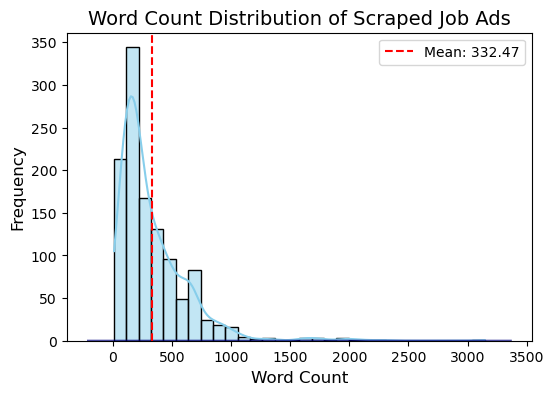

In [9]:
plt.figure(figsize=(6, 4)) 

sns.histplot(cosine_user1['word_count'], bins=30, kde=True, color='skyblue', edgecolor='black')
sns.kdeplot(cosine_user1['word_count'], color='navy', linewidth=1.5, alpha=0.7)

plt.title('Word Count Distribution of Scraped Job Ads', fontsize=14)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

mean_word_count = cosine_user1['word_count'].mean()
plt.axvline(mean_word_count, color='red', linestyle='--', label=f'Mean: {mean_word_count:.2f}')


plt.legend()
plt.show()

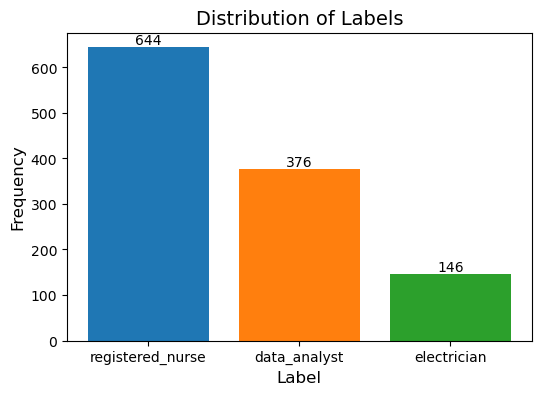

In [10]:
label_counts = cosine_user1['label'].value_counts()
    
plt.figure(figsize=(6, 4))

bars = plt.bar(label_counts.index, label_counts.values, color=plt.cm.tab10(range(len(label_counts))))
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

plt.title('Distribution of Labels', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
    
plt.xticks(rotation=0)
plt.show()

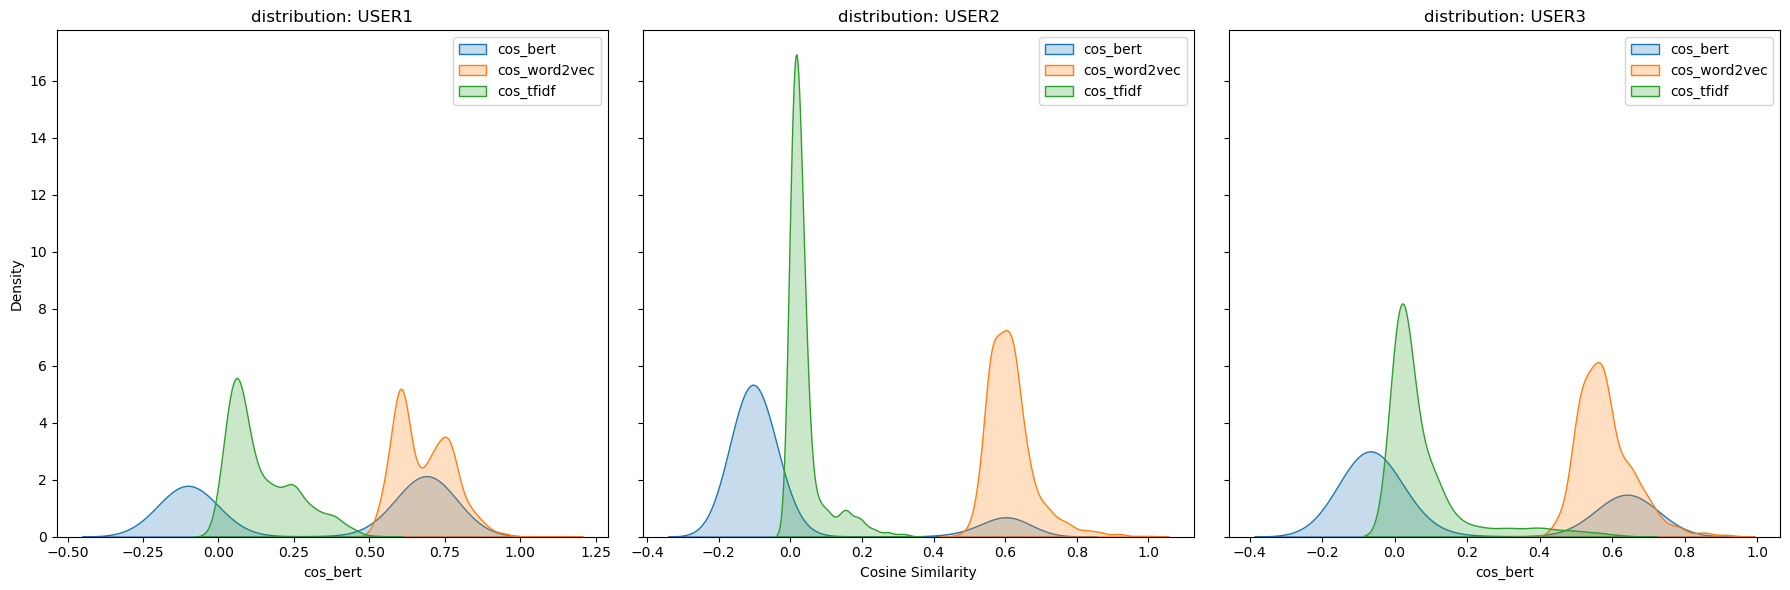

In [11]:
# Setting up the figure for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for col in ['cos_bert', 'cos_word2vec', 'cos_tfidf']:
    sns.kdeplot(cosine_user1[col], label=col, fill=True, ax=axes[0])
axes[0].set_title('distribution: USER1')
axes[0].set_ylabel('Density')
axes[0].legend()

for col in ['cos_bert', 'cos_word2vec', 'cos_tfidf']:
    sns.kdeplot(cosine_user2[col], label=col, fill=True, ax=axes[1])
axes[1].set_title('distribution: USER2')
axes[1].set_xlabel('Cosine Similarity')

for col in ['cos_bert', 'cos_word2vec', 'cos_tfidf']:
    sns.kdeplot(cosine_user3[col], label=col, fill=True, ax=axes[2])
axes[2].set_title('distribution: USER3')
axes[1].legend()
axes[2].legend()

plt.tight_layout()
plt.show()


In [12]:
# Assuming df is your DataFrame
positive_cos_bert_rn = len(cosine_user1[(cosine_user1['cos_bert'] > 0) & (cosine_user1['label'] == 'registered_nurse')])
positive_cos_bert_el = len(cosine_user2[(cosine_user2['cos_bert'] > 0) & (cosine_user2['label'] == 'electrician')])
positive_cos_bert_da = len(cosine_user3[(cosine_user3['cos_bert'] > 0) & (cosine_user3['label'] == 'data_analyst')])

print(f'Total number for registered nurse job positions to user1 is: {positive_cos_bert_rn}'+'\n'+
      f'Total number for electician job positions to user2 is: {positive_cos_bert_el}'+'\n'+
      f'Total number for data analyst job positions to user3 is: {positive_cos_bert_da}')

Total number for registered nurse job positions to user1 is: 644
Total number for electician job positions to user2 is: 146
Total number for data analyst job positions to user3 is: 376


interpretation: 

- *word count*: The statistics for word count remain consistent across the DFs for all three users, as each user's cosine similarity was calculated using the same set of job advertisements. The mean word count stands at approximately 332.47 words, suggesting that the average length of the text extracted from Indeed.com is around 330 words. Nonetheless, there is a wide variation in the length of job ads, with word counts ranging from as few as 10 to as many as 3145 words, indicating a significant inconsistency in the length of text across different job ads.
- *cos_bert*: For user1, the positive mean value of 0.332 is attributed to a higher count of job advertisements for nursing positions compared to other professions. Conversely, user2 exhibits a negative mean of -0.014, reflecting the relatively lower number of job ads for electricians. However, user3 demonstrates a mean cos_bert value of 0.166, which falls between 0.332 and -0.014. This observation clearly demonstrates the proportionality for the number of job ads to each user.
- *cos_word2vec*:The high average, min, and max similarity scores observed for all three users in this method may suggest two possible scenarios. Firstly, it could imply that the model performed poorly. Alternatively, it might indicate that using Word2Vec to distinguish the similarity among various job advertisements is relatively ineffective compared to other applications.
- *cos_tfidf*: The variation in average similarity scores closely mirrors that of cos_bert, yet with a narrower spread between the lowest and highest scores and the absence of negative values. This could suggest that while this method is capable of identifying similarities, it falls short in effectively differentiating dissimilarities.

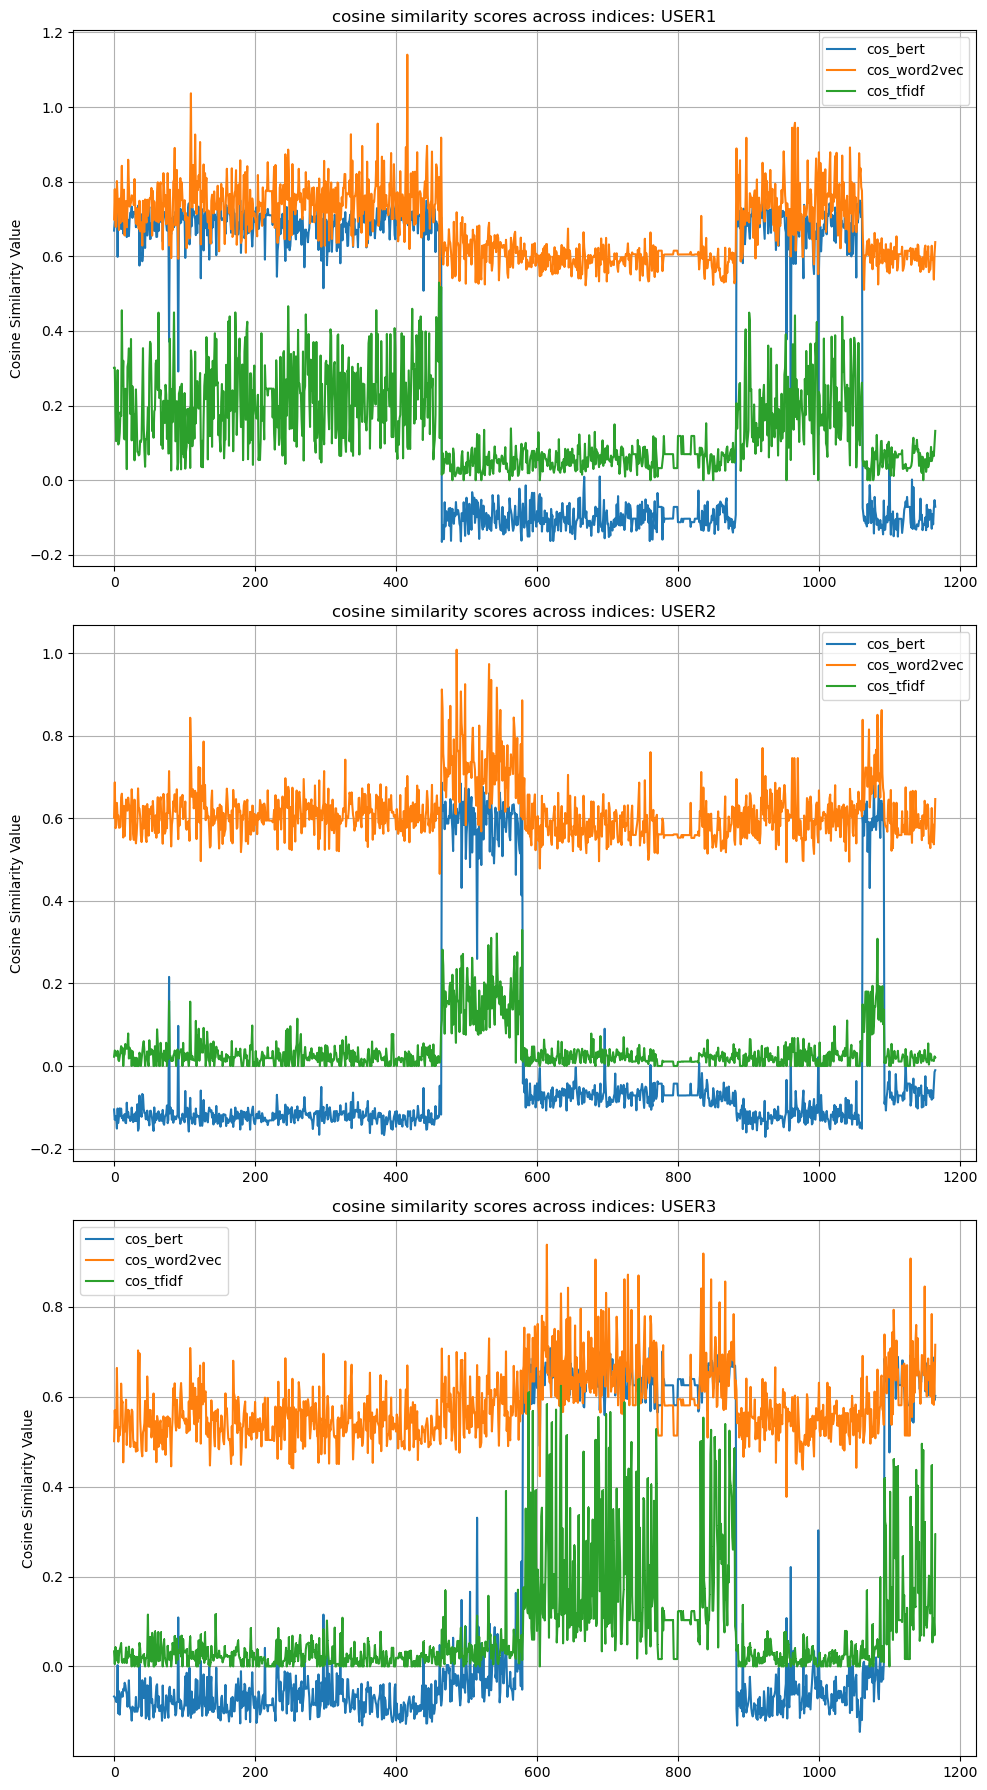

In [13]:
# Setup the figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 18))  # 3 rows, 1 column

# Plot for user1.
axs[0].plot(cosine_user1.index, cosine_user1['cos_bert'], label='cos_bert')
axs[0].plot(cosine_user1.index, cosine_user1['cos_word2vec'], label='cos_word2vec')
axs[0].plot(cosine_user1.index, cosine_user1['cos_tfidf'], label='cos_tfidf')
axs[0].set_title('cosine similarity scores across indices: USER1')
axs[0].set_ylabel('Cosine Similarity Value')
axs[0].legend()
axs[0].grid(True)

# Plot for user2.
axs[1].plot(cosine_user2.index, cosine_user2['cos_bert'], label='cos_bert')
axs[1].plot(cosine_user2.index, cosine_user2['cos_word2vec'], label='cos_word2vec')
axs[1].plot(cosine_user2.index, cosine_user2['cos_tfidf'], label='cos_tfidf')
axs[1].set_title('cosine similarity scores across indices: USER2')
axs[1].set_ylabel('Cosine Similarity Value')
axs[1].legend()
axs[1].grid(True)

# Plot for user3.
axs[2].plot(cosine_user3.index, cosine_user3['cos_bert'], label='cos_bert')
axs[2].plot(cosine_user3.index, cosine_user3['cos_word2vec'], label='cos_word2vec')
axs[2].plot(cosine_user3.index, cosine_user3['cos_tfidf'], label='cos_tfidf', marker=',')
axs[2].set_title('cosine similarity scores across indices: USER3')
axs[2].set_ylabel('Cosine Similarity Value')
axs[2].legend()
axs[2].grid(True)


# Adjust layout for better spacing
plt.tight_layout()
plt.show()


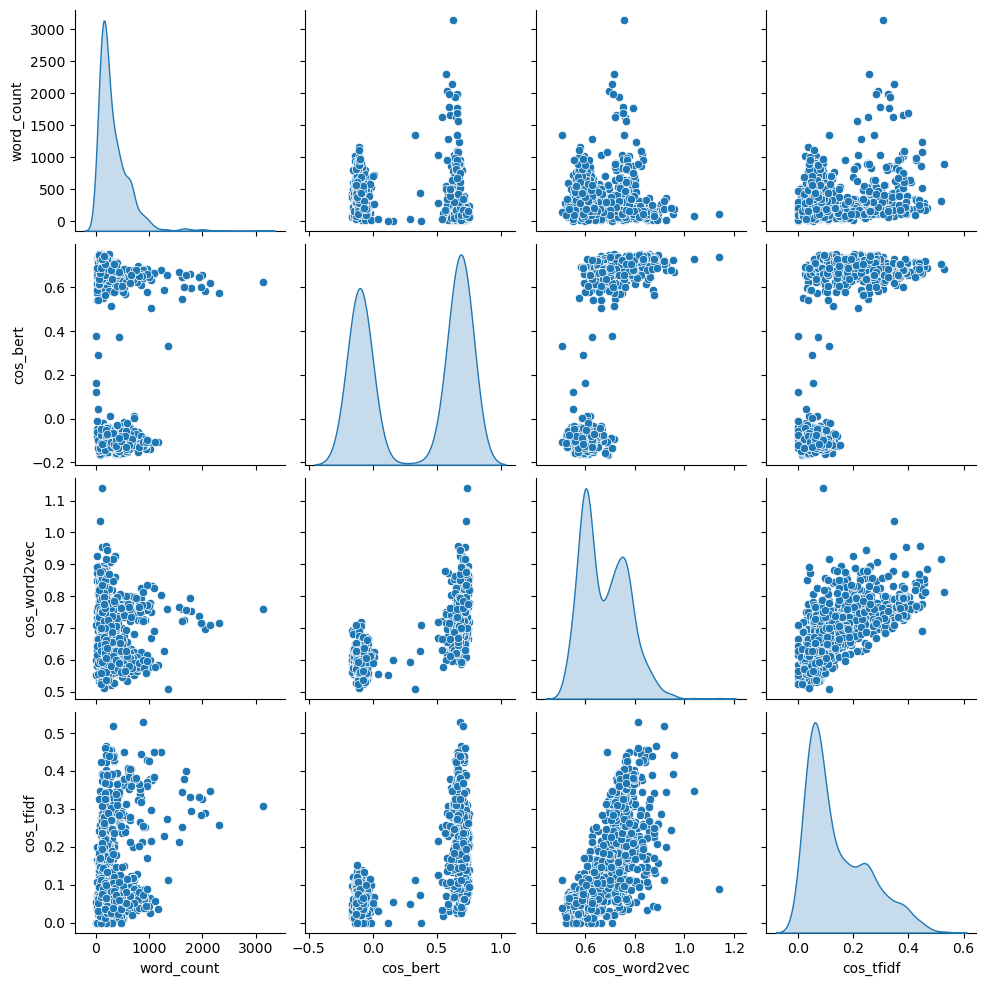

In [14]:
sns.pairplot(cosine_user1, diag_kind='kde')

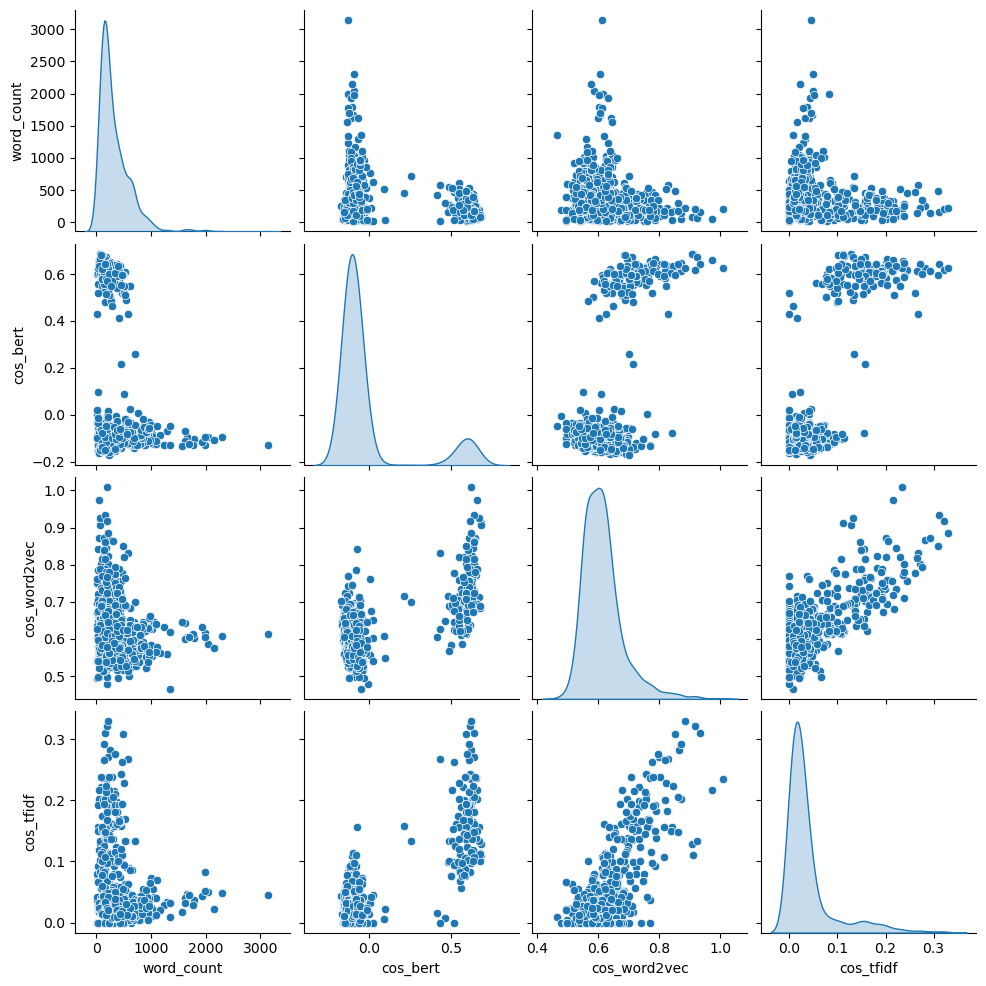

In [15]:
sns.pairplot(cosine_user2, diag_kind='kde')

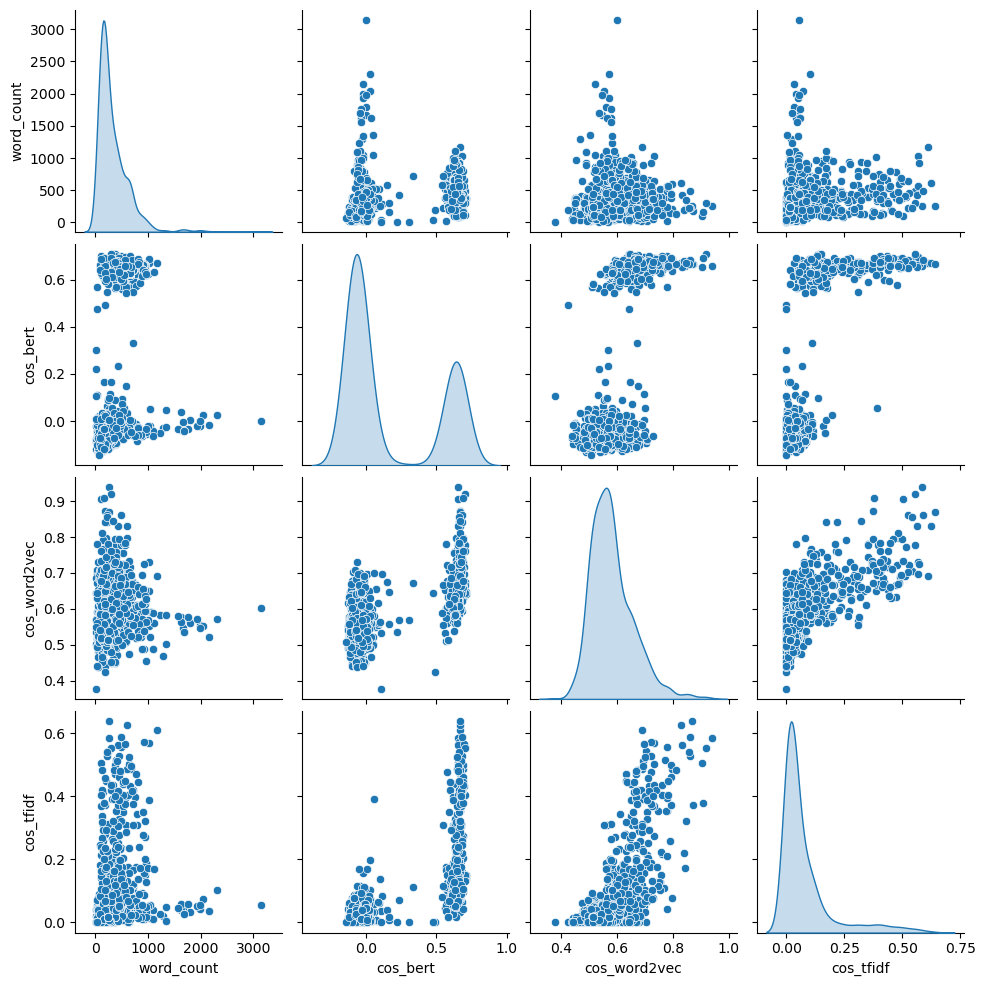

In [16]:
sns.pairplot(cosine_user3, diag_kind='kde')

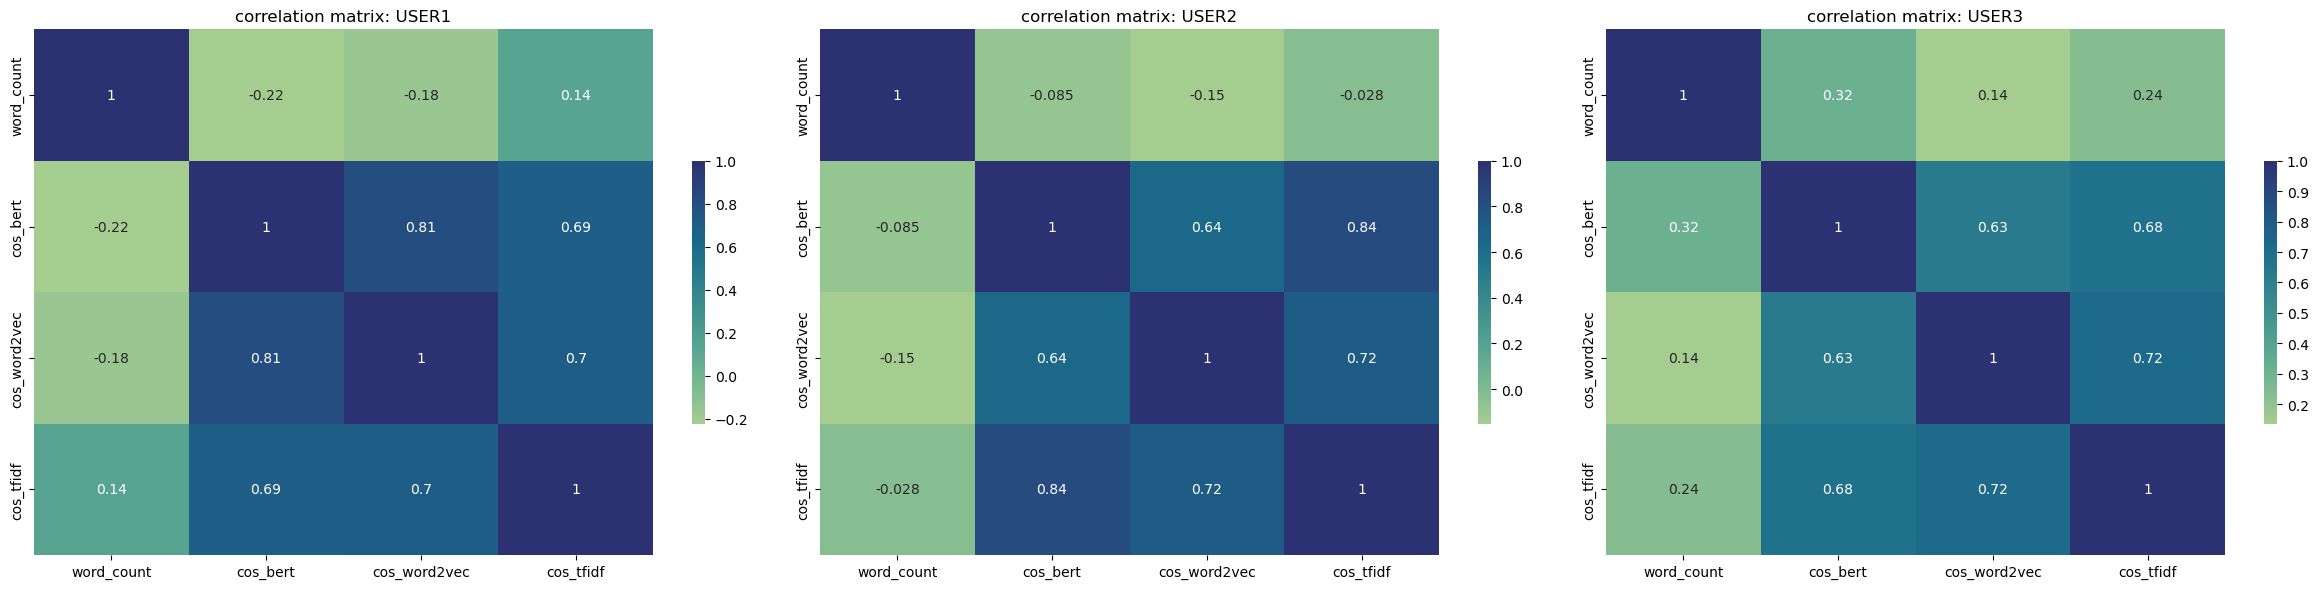

In [17]:
# Define a list of DataFrames for easier iteration
dfs = [cosine_user1, cosine_user2, cosine_user3]
titles = ['correlation matrix: USER1', 'correlation matrix: USER2', 'correlation matrix: USER3']

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

for ax, df, title in zip(axes, dfs, titles):
    correlation_matrix = df[['word_count', 'cos_bert', 'cos_word2vec', 'cos_tfidf']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='crest', ax=ax, cbar_kws={'shrink': .5})
    ax.set_title(title)
    
plt.tight_layout()
plt.show()


In [18]:
# Normalize and rank the 'cos_bert' values from 0 to 10
cosine_user1['bert_ranking'] = (cosine_user1['cos_bert'] - cosine_user1['cos_bert'].min()) / (cosine_user1['cos_bert'].max() - cosine_user1['cos_bert'].min()) * 3
cosine_user1['word2vec_ranking'] = (cosine_user1['cos_word2vec'] - cosine_user1['cos_word2vec'].min()) / (cosine_user1['cos_word2vec'].max() - cosine_user1['cos_word2vec'].min()) * 3
cosine_user1['tfidf_ranking'] = (cosine_user1['cos_tfidf'] - cosine_user1['cos_tfidf'].min()) / (cosine_user1['cos_tfidf'].max() - cosine_user1['cos_tfidf'].min()) * 3
cosine_user1.head(3)

,title,id,link,date,job_description,label,word_count,cos_bert,cos_word2vec,cos_tfidf,bert_ranking,word2vec_ranking,tfidf_ranking
0,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,502,0.668876,0.698632,0.301457,2.724964,0.899792,1.707857
1,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,231,0.695014,0.779827,0.301988,2.810352,1.285985,1.710867
2,registered nurse,job_4e16e9830b072344,https://ie.indeed.com/rc/clk?jk=4e16e9830b0723...,"January 10, 2024","access healthcare, one of irelands leading hea...",registered_nurse,182,0.699538,0.679980,0.182783,2.825132,0.811073,1.035530


In [19]:
cosine_user1 = cosine_user1.sort_values(by='bert_ranking', ascending=False).reset_index(drop=True)
first_occurrence_index = cosine_user1.loc[cosine_user1['label'] != 'registered_nurse'].index.min()

if pd.notnull(first_occurrence_index):
    print(f"The first occurrence of another label is at index: {first_occurrence_index}")
    print(f"The label at this index is: {cosine_user1.loc[first_occurrence_index, 'label']}")
else:
    print("There are no labels other than 'registered_nurse' in the DataFrame.")

The first occurrence of another label is at index: 644
The label at this index is: data_analyst


In [20]:
cosine_user1.iloc[642:648]

,title,id,link,date,job_description,label,word_count,cos_bert,cos_word2vec,cos_tfidf,bert_ranking,word2vec_ranking,tfidf_ranking
642,staff nurse - infection prevention & control,job_f95ecccbd3648793,https://ie.indeed.com/rc/clk?jk=f95ecccbd36487...,"January 16, 2024","job purpose: for further details, please see j...",registered_nurse,10,0.160393,0.599688,0.054105,1.063856,0.429175,0.306526
643,canp / ranp - epilepsy,job_a232b6ddd6e3c581,https://ie.indeed.com/rc/clk?jk=a232b6ddd6e3c5...,"January 13, 2024",job purpose for more information please see jo...,registered_nurse,10,0.121080,0.552228,0.000000,0.935430,0.203440,0.000000
644,grade 5 data analyst,job_2cd6be32a1f3f25a,https://ie.indeed.com/rc/clk?jk=2cd6be32a1f3f2...,"January 20, 2024",professional and technical grade 5 dublin 12 m...,data_analyst,37,0.043637,0.554342,0.029579,0.682440,0.213496,0.167575
645,business analyst,job_dc2f1f2adb30c982,https://ie.indeed.com/rc/clk?jk=dc2f1f2adb30c9...,"before December 11, 2023","about the team you must have valid irish, uk, ...",data_analyst,723,0.010067,0.607420,0.067244,0.572771,0.465953,0.380963
646,health technology assessment (hta) analyst,job_eb8fd6ac3097c434,https://ie.indeed.com/rc/clk?jk=eb8fd6ac3097c4...,"January 07, 2024","your new company your new role as hta analyst,...",data_analyst,265,0.009325,0.623010,0.039624,0.570347,0.540104,0.224481
647,data scientists | data analysts | data enginee...,job_e61436e1b104ace1,https://ie.indeed.com/rc/clk?jk=e61436e1b104ac...,"January 13, 2024",about us auticon is a social enterprise whose ...,data_analyst,714,0.001941,0.590430,0.051147,0.546227,0.385143,0.289763


In [21]:
ideal_df = cosine_user1.iloc[:644]
# Count the values in the "label" column
label_counts = ideal_df['label'].value_counts()

print(label_counts)

registered_nurse    644
Name: label, dtype: int64


In [72]:
cosine_user1 = cosine_user1.sort_values(by='word2vec_ranking', ascending=False).reset_index(drop=True)
first_occurrence_index = cosine_user1.loc[cosine_user1['label'] != 'registered_nurse'].index.min()

if pd.notnull(first_occurrence_index):
    print(f"The first occurrence of another label is at index: {first_occurrence_index}")
    print(f"The label at this index is: {cosine_user1.loc[first_occurrence_index, 'label']}")
else:
    print("There are no labels other than 'registered_nurse' in the DataFrame.")

The first occurrence of another label is at index: 432
The label at this index is: electrician


In [73]:
cosine_user1.iloc[430:436]

,title,id,link,date,job_description,label,word_count,cos_bert,cos_word2vec,cos_tfidf,bert_ranking,word2vec_ranking,tfidf_ranking
430,staff nurse intellectual disability - dublin,job_4f32a7afed490c7c,https://ie.indeed.com/rc/clk?jk=4f32a7afed490c...,"January 10, 2024",the successful candidate will: be on the cur...,registered_nurse,131,0.699890,0.719229,0.252870,2.826283,0.997757,1.432595
431,clinical research nurse,job_640ad2f335554f05,https://ie.indeed.com/rc/clk?jk=640ad2f335554f...,"January 07, 2024",role for rgn with clinical research experience...,registered_nurse,282,0.514370,0.718233,0.126561,2.220228,0.993019,0.717010
432,electrical maintenance technician,job_0b481f31ed838110,https://ie.indeed.com/rc/clk?jk=0b481f31ed8381...,"January 02, 2024",summary: electrical maintenance technician per...,electrician,196,-0.091420,0.717974,0.018619,0.241235,0.991789,0.105485
433,staff nurse - cath lab,job_56fc431876e86e30,https://ie.indeed.com/rc/clk?jk=56fc431876e86e...,"January 05, 2024",ttm healthcare are currently recruiting a staf...,registered_nurse,70,0.719516,0.717459,0.071593,2.890396,0.989338,0.405597
434,theatre staff nurse,job_8dac085957f00f90,https://ie.indeed.com/rc/clk?jk=8dac085957f00f...,"January 20, 2024",we are looking for nurses to join our team res...,registered_nurse,70,0.750300,0.717236,0.138200,2.990961,0.988279,0.782951
435,assistant director of nursing,job_c77e1da58495595b,https://ie.indeed.com/rc/clk?jk=c77e1da5849559...,"before December 11, 2023",clarity are recruiting for assistant director ...,registered_nurse,153,0.711163,0.717122,0.316865,2.863108,0.987738,1.795149


In [74]:
ideal_df = cosine_user1.iloc[:644]
# Count the values in the "label" column
label_counts = ideal_df['label'].value_counts()

print(label_counts)

registered_nurse    602
electrician          33
data_analyst          9
Name: label, dtype: int64


In [76]:
cosine_user1 = cosine_user1.sort_values(by='tfidf_ranking', ascending=False).reset_index(drop=True)
first_occurrence_index = cosine_user1.loc[cosine_user1['label'] != 'registered_nurse'].index.min()

if pd.notnull(first_occurrence_index):
    print(f"The first occurrence of another label is at index: {first_occurrence_index}")
    print(f"The label at this index is: {cosine_user1.loc[first_occurrence_index, 'label']}")
else:
    print("There are no labels other than 'registered_nurse' in the DataFrame.")

The first occurrence of another label is at index: 433
The label at this index is: data_analyst


In [77]:
ideal_df = cosine_user1.iloc[:644]
# Count the values in the "label" column
label_counts = ideal_df['label'].value_counts()

print(label_counts)

registered_nurse    575
data_analyst         55
electrician          14
Name: label, dtype: int64


human ranking

In [78]:
cosine_user1['label'].value_counts()

registered_nurse    644
data_analyst        376
electrician         146
Name: label, dtype: int64

user1

In [79]:
# Randomly select 10 numbers from the range 0-30 (top 30 ranked 'registered_nurse' jobs for user1)
random.seed(630)
numbers_0_30 = random.sample(range(31), 10)

# Randomly select 10 numbers from the range 613-643 (least 30 ranked 'registered_nurse' jobs for user1)
numbers_613_643 = random.sample(range(613, 644), 10)

# Randomly select 3 numbers from the range 644-664 (top 20 ranked jobs for user1 that is not 'registered_nurse')
numbers_644_664 = random.sample(range(644, 665), 3)

# Randomly select 4 numbers from the range 895-915 (middle 30 ranked jobs for user1 that is not 'registered_nurse')
numbers_895_915 = random.sample(range(895, 916), 4)

# Randomly select 3 numbers from the range 1136-1166 (least 20 ranking jobs for user1 that is not 'registered_nurse')
numbers_1136_1166 = random.sample(range(1136, 1167), 3)

print('Randomly selected rows for jobs ranked as 3:', numbers_0_30)
print('Randomly selected rows for jobs ranked as 2:', numbers_613_643)
print('Randomly selected rows for jobs ranked as 1:', numbers_644_664, numbers_895_915, numbers_1136_1166)

Randomly selected rows for jobs ranked as 3: [14, 4, 16, 2, 19, 11, 6, 8, 5, 12]
Randomly selected rows for jobs ranked as 2: [632, 625, 631, 615, 619, 639, 642, 626, 629, 634]
Randomly selected rows for jobs ranked as 1: [652, 649, 656] [895, 896, 908, 897] [1153, 1145, 1155]


In [80]:
cosine_user1 = cosine_user1.sort_values(by='bert_ranking', ascending=False).reset_index(drop=True)
user1_bert = cosine_user1.iloc[numbers_0_30 + numbers_613_643 + numbers_644_664 + numbers_895_915 + numbers_1136_1166].sort_values(by='bert_ranking', ascending=False).reset_index(drop=True)
label_values = [3] * 10 + [2] * 10 + [1] * 10
user1_bert['label'] = label_values
user1_bert = user1_bert[['link', 'label', 'bert_ranking']]
user1_bert['human_ranking'] = ''
# Shuffle the rows of the DataFrame
user1_bert = user1_bert.sample(frac=1).reset_index(drop=True)

# Print the shuffled DataFrame
user1_bert

,link,label,bert_ranking,human_ranking
0,https://ie.indeed.com/rc/clk?jk=79f2fe2f95097f...,3,2.977335,
1,https://ie.indeed.com/rc/clk?jk=40a229a27d1d3f...,3,2.986822,
2,https://ie.indeed.com/rc/clk?jk=03057b6d4c356c...,1,0.023958,
3,https://ie.indeed.com/rc/clk?jk=9f47622d34693b...,3,2.969835,
4,https://ie.indeed.com/rc/clk?jk=841a4dd6a74b4c...,1,0.053171,
5,https://ie.indeed.com/rc/clk?jk=97ef94a905366f...,3,2.983024,
6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,3,2.988304,
7,https://ie.indeed.com/rc/clk?jk=4c3a97c49465fb...,2,2.495173,
8,https://ie.indeed.com/rc/clk?jk=f95ecccbd36487...,2,1.063856,
9,https://ie.indeed.com/rc/clk?jk=8ab3694f564f21...,1,0.428209,


In [81]:
cosine_user1 = cosine_user1.sort_values(by='word2vec_ranking', ascending=False).reset_index(drop=True)
user1_word2vec = cosine_user1.iloc[numbers_0_30 + numbers_613_643 + numbers_644_664 + numbers_1136_1166 + numbers_895_915].sort_values(by='word2vec_ranking', ascending=False).reset_index(drop=True)
label_values = [3] * 10 + [2] * 10 + [1] * 10
user1_word2vec['label'] = label_values
user1_word2vec = user1_word2vec[['link', 'label', 'word2vec_ranking']]
user1_word2vec['human_ranking'] = ''
# Shuffle the rows of the DataFrame
user1_word2vec = user1_word2vec.sample(frac=1).reset_index(drop=True)

# Print the shuffled DataFrame
user1_word2vec

,link,label,word2vec_ranking,human_ranking
0,https://ie.indeed.com/rc/clk?jk=2d5079de4f411d...,1,0.097704,
1,https://ie.indeed.com/rc/clk?jk=c4622b380b38ad...,3,2.069302,
2,https://ie.indeed.com/rc/clk?jk=231800c6716550...,1,0.431595,
3,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,1,0.618134,
4,https://ie.indeed.com/rc/clk?jk=d5e214ab45a374...,2,0.641200,
5,https://ie.indeed.com/rc/clk?jk=2099ec6186a6a9...,3,1.768307,
6,https://ie.indeed.com/rc/clk?jk=8f9ead4dd938a5...,1,0.127283,
7,https://ie.indeed.com/rc/clk?jk=8dc5a38de603aa...,1,0.445842,
8,https://ie.indeed.com/rc/clk?jk=b9183dead0d5ae...,1,0.611505,
9,https://ie.indeed.com/rc/clk?jk=312de2f89ee9da...,3,1.821761,


In [82]:
cosine_user1 = cosine_user1.sort_values(by='tfidf_ranking', ascending=False).reset_index(drop=True)
user1_tfidf = cosine_user1.iloc[numbers_0_30 + numbers_613_643 + numbers_644_664 + numbers_1136_1166 + numbers_895_915].sort_values(by='tfidf_ranking', ascending=False).reset_index(drop=True)
label_values = [3] * 10 + [2] * 10 + [1] * 10
user1_tfidf['label'] = label_values
user1_tfidf = user1_tfidf[['link', 'label', 'tfidf_ranking']]
user1_tfidf['human_ranking'] = ''
# Shuffle the rows of the DataFrame
user1_tfidf = user1_tfidf.sample(frac=1).reset_index(drop=True)

# Print the shuffled DataFrame
user1_tfidf

,link,label,tfidf_ranking,human_ranking
0,https://ie.indeed.com/rc/clk?jk=076645ecf61875...,1,0.297915,
1,https://ie.indeed.com/rc/clk?jk=814bc0f2f31305...,1,0.476065,
2,https://ie.indeed.com/rc/clk?jk=761d49f6acdcf1...,3,2.426315,
3,https://ie.indeed.com/rc/clk?jk=8a8c8a9e66a5ba...,2,0.483804,
4,https://ie.indeed.com/rc/clk?jk=e6e3b920cf5563...,1,0.477575,
5,https://ie.indeed.com/rc/clk?jk=ceec31052fe119...,2,0.495343,
6,https://ie.indeed.com/rc/clk?jk=db1a8eb9b1eb08...,3,2.547429,
7,https://ie.indeed.com/rc/clk?jk=b34cbdba439e0c...,1,0.063580,
8,https://ie.indeed.com/rc/clk?jk=a915ccf4b764f5...,1,0.305079,
9,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,3,2.481885,


user2

In [83]:
# Normalize and rank the 'cos_bert' values from 0 to 3
cosine_user2['bert_ranking'] = (cosine_user2['cos_bert'] - cosine_user2['cos_bert'].min()) / (cosine_user2['cos_bert'].max() - cosine_user2['cos_bert'].min()) * 3
cosine_user2['word2vec_ranking'] = (cosine_user2['cos_word2vec'] - cosine_user2['cos_word2vec'].min()) / (cosine_user2['cos_word2vec'].max() - cosine_user2['cos_word2vec'].min()) * 3
cosine_user2['tfidf_ranking'] = (cosine_user2['cos_tfidf'] - cosine_user2['cos_tfidf'].min()) / (cosine_user2['cos_tfidf'].max() - cosine_user2['cos_tfidf'].min()) * 3
cosine_user2.head(3)

,title,id,link,date,job_description,label,word_count,cos_bert,cos_word2vec,cos_tfidf,bert_ranking,word2vec_ranking,tfidf_ranking
0,electrician - dublin,sj_ff027deb913e2c1b,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,epower.ie we are specialists in the area elect...,electrician,216,0.623614,0.885717,0.329614,2.781036,2.322770,3.000000
1,electrician,job_acaba40c1211620c,https://ie.indeed.com/rc/clk?jk=acaba40c121162...,"January 08, 2024",main responsibilities: reading technical diagr...,electrician,202,0.615101,0.916395,0.320897,2.751270,2.492280,2.920661
2,electrician - dublin,sj_d2271d712c8ddb52,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,epower.ie we are specialists in the area elect...,electrician,158,0.642440,0.935107,0.310292,2.846862,2.595679,2.824144


In [84]:
random.seed(820)

# Randomly select 10 numbers from the range 0-30 (top 30 ranked 'electrician' jobs for user2)
numbers_0_30 = random.sample(range(31), 10)

# Randomly select 10 numbers from the range 115-145 (least 30 ranked 'electrician' jobs for user2)
numbers_115_145 = random.sample(range(115, 146), 10)

# Randomly select 3 numbers from the range 146-156 (top 20 ranked jobs for user2 that is not 'electrician')
numbers_146_156 = random.sample(range(146, 157), 3)

# Randomly select 3 numbers from the range 641-671 (least 20 ranking jobs for user2 that is not 'electrician')
numbers_641_671 = random.sample(range(641, 672), 3)

# Randomly select 4 numbers from the range 1136-1166 (middle 30 ranked jobs for user2 that is not 'electrician')
numbers_1136_1166 = random.sample(range(1136, 1167), 4)

print('Randomly selected rows for jobs ranked as 3:', numbers_0_30)
print('Randomly selected rows for jobs ranked as 2:', numbers_115_145)
print('Randomly selected rows for jobs ranked as 1:', numbers_146_156, numbers_641_671, numbers_1136_1166)

Randomly selected rows for jobs ranked as 3: [6, 10, 16, 15, 3, 30, 7, 8, 18, 1]
Randomly selected rows for jobs ranked as 2: [142, 118, 121, 125, 117, 131, 135, 124, 126, 116]
Randomly selected rows for jobs ranked as 1: [151, 153, 146] [660, 662, 658] [1156, 1149, 1143, 1144]


In [85]:
cosine_user2 = cosine_user2.sort_values(by='bert_ranking', ascending=False).reset_index(drop=True)
user2_bert = cosine_user2.iloc[numbers_0_30 + numbers_115_145 + numbers_146_156 + numbers_641_671 + numbers_1136_1166].sort_values(by='bert_ranking', ascending=False).reset_index(drop=True)
label_values = [3] * 10 + [2] * 10 + [1] * 10
user2_bert['label'] = label_values
user2_bert = user2_bert[['link', 'label', 'bert_ranking']]
user2_bert['human_ranking'] = ''
# Shuffle the rows of the DataFrame
user2_bert = user2_bert.sample(frac=1).reset_index(drop=True)

# Print the shuffled DataFrame
user2_bert

,link,label,bert_ranking,human_ranking
0,https://ie.indeed.com/rc/clk?jk=c049f17dcd7764...,1,0.217657,
1,https://ie.indeed.com/rc/clk?jk=ca55b895c06263...,2,2.512606,
2,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,3,2.947667,
3,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,3,2.845031,
4,https://ie.indeed.com/rc/clk?jk=1e4e9f976c9ab3...,3,2.894407,
5,https://ie.indeed.com/rc/clk?jk=8c20503f7a362f...,1,0.627801,
6,https://ie.indeed.com/rc/clk?jk=b66e18cb48768a...,2,2.545901,
7,https://ie.indeed.com/rc/clk?jk=152f5dfc0ba8aa...,1,1.354901,
8,https://ie.indeed.com/rc/clk?jk=f9df7e69e2d32c...,1,0.217657,
9,https://ie.indeed.com/rc/clk?jk=2f9caf1da264c5...,3,2.915483,


In [86]:
cosine_user2 = cosine_user2.sort_values(by='word2vec_ranking', ascending=False).reset_index(drop=True)
user2_word2vec = cosine_user2.iloc[numbers_0_30 + numbers_115_145 + numbers_146_156 + numbers_641_671 + numbers_1136_1166].sort_values(by='word2vec_ranking', ascending=False).reset_index(drop=True)
label_values = [3] * 10 + [2] * 10 + [1] * 10
user2_word2vec['label'] = label_values
user2_word2vec = user2_word2vec[['link', 'label', 'word2vec_ranking']]
user2_word2vec['human_ranking'] = ''
# Shuffle the rows of the DataFrame
user2_word2vec = user2_word2vec.sample(frac=1).reset_index(drop=True)

# Print the shuffled DataFrame
user2_word2vec

,link,label,word2vec_ranking,human_ranking
0,https://ie.indeed.com/rc/clk?jk=08d8dbfaf2bcca...,2,1.235800,
1,https://ie.indeed.com/rc/clk?jk=b9091ab4c52743...,3,2.016887,
2,https://ie.indeed.com/rc/clk?jk=a6937c5385359d...,3,2.212043,
3,https://ie.indeed.com/rc/clk?jk=f44f663f1f7958...,2,1.219293,
4,https://ie.indeed.com/rc/clk?jk=7afa6dde343412...,1,0.291559,
5,https://ie.indeed.com/rc/clk?jk=c311547ff571ec...,2,1.181852,
6,https://ie.indeed.com/rc/clk?jk=013cc9719938cb...,3,2.538434,
7,https://ie.indeed.com/rc/clk?jk=35f17e17158b10...,3,2.441689,
8,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,2,1.246529,
9,https://ie.indeed.com/rc/clk?jk=b8887616fcedec...,1,0.712881,


In [87]:
cosine_user2 = cosine_user2.sort_values(by='tfidf_ranking', ascending=False).reset_index(drop=True)
user2_tfidf = cosine_user2.iloc[numbers_0_30 + numbers_115_145 + numbers_146_156 + numbers_641_671 + numbers_1136_1166].sort_values(by='tfidf_ranking', ascending=False).reset_index(drop=True)
label_values = [3] * 10 + [2] * 10 + [1] * 10
user2_tfidf['label'] = label_values
user2_tfidf = user2_tfidf[['link', 'label', 'tfidf_ranking']]
user2_tfidf['human_ranking'] = ''
# Shuffle the rows of the DataFrame
user2_tfidf = user2_tfidf.sample(frac=1).reset_index(drop=True)

# Print the shuffled DataFrame
user2_tfidf

,link,label,tfidf_ranking,human_ranking
0,https://ie.indeed.com/rc/clk?jk=4b6c82cebd143a...,1,0.718024,
1,https://ie.indeed.com/rc/clk?jk=677a483aa35f48...,2,0.749041,
2,https://ie.indeed.com/rc/clk?jk=712b10f2f2d144...,2,0.921605,
3,https://ie.indeed.com/rc/clk?jk=0b481f31ed8381...,3,2.138054,
4,https://ie.indeed.com/rc/clk?jk=6330d03ba7d071...,2,0.892751,
5,https://ie.indeed.com/rc/clk?jk=338053e6961ee5...,2,0.819714,
6,https://ie.indeed.com/rc/clk?jk=36ce8a8689df3d...,3,2.385911,
7,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,1,0.000000,
8,https://ie.indeed.com/rc/clk?jk=d135bb38e460cb...,1,0.000000,
9,https://ie.indeed.com/rc/clk?jk=acaba40c121162...,3,2.920661,


In [88]:
# Normalize and rank the 'cos_bert' values from 0 to 3
cosine_user3['bert_ranking'] = (cosine_user3['cos_bert'] - cosine_user3['cos_bert'].min()) / (cosine_user3['cos_bert'].max() - cosine_user3['cos_bert'].min()) * 3
cosine_user3['word2vec_ranking'] = (cosine_user3['cos_word2vec'] - cosine_user3['cos_word2vec'].min()) / (cosine_user3['cos_word2vec'].max() - cosine_user3['cos_word2vec'].min()) * 3
cosine_user3['tfidf_ranking'] = (cosine_user3['cos_tfidf'] - cosine_user3['cos_tfidf'].min()) / (cosine_user3['cos_tfidf'].max() - cosine_user3['cos_tfidf'].min()) * 3
cosine_user3.head(3)

,title,id,link,date,job_description,label,word_count,cos_bert,cos_word2vec,cos_tfidf,bert_ranking,word2vec_ranking,tfidf_ranking
0,senior business analyst,job_d4a6238163abf1d1,https://ie.indeed.com/rc/clk?jk=d4a6238163abf1...,"before December 11, 2023",type contract start asap senior business analy...,data_analyst,260,0.666505,0.869938,0.639187,2.847550,2.634288,3.000000
1,data defense operations analyst,job_029f8814f243ef67,https://ie.indeed.com/rc/clk?jk=029f8814f243ef...,"December 15, 2023",responsibilities creation is the core of tikt...,data_analyst,609,0.668016,0.830030,0.624442,2.852849,2.420948,2.930795
2,data analytics and ai - senior manager - data ...,job_674b546113ddd3c6,https://ie.indeed.com/rc/clk?jk=674b546113ddd3...,"January 09, 2024",senior manager data architect general informa...,data_analyst,1165,0.668366,0.690670,0.609795,2.854077,1.675959,2.862049


In [89]:
random.seed(215)

# Randomly select 10 numbers from the range 0-30 (top 30 ranked 'data_analyst' jobs for user3)
numbers_0_30 = random.sample(range(31), 10)

# Randomly select 10 numbers from the range 345-375 (least 30 ranked 'data_analyst' jobs for user3)
numbers_345_375 = random.sample(range(345, 376), 10)

# Randomly select 3 numbers from the range 376-396 (top 20 ranked jobs for user3 that is not 'data_analyst')
numbers_376_396 = random.sample(range(376, 397), 3)

# Randomly select 3 numbers from the range 755-785 (middle 30 ranking jobs for user3 that is not 'data_analyst')
numbers_755_785 = random.sample(range(755, 786), 4)

# Randomly select 4 numbers from the range 1136-1166 (least 20 ranked jobs for user3 that is not 'data_analyst')
numbers_1136_1166 = random.sample(range(1136, 1167), 3)

print('Randomly selected rows for jobs ranked as 3:', numbers_0_30)
print('Randomly selected rows for jobs ranked as 2:', numbers_345_375)
print('Randomly selected rows for jobs ranked as 1:', numbers_376_396, numbers_641_671, numbers_1136_1166)

Randomly selected rows for jobs ranked as 3: [1, 20, 10, 3, 9, 7, 2, 21, 30, 17]
Randomly selected rows for jobs ranked as 2: [357, 354, 366, 345, 370, 348, 364, 368, 350, 353]
Randomly selected rows for jobs ranked as 1: [396, 379, 392] [660, 662, 658] [1152, 1140, 1157]


In [90]:

cosine_user3 = cosine_user3.sort_values(by='bert_ranking', ascending=False).reset_index(drop=True)
user3_bert = cosine_user3.iloc[numbers_0_30 + numbers_345_375 + numbers_376_396 + numbers_755_785 + numbers_1136_1166].sort_values(by='bert_ranking', ascending=False).reset_index(drop=True)
label_values = [3] * 10 + [2] * 10 + [1] * 10
user3_bert['label'] = label_values
user3_bert = user3_bert[['link', 'label', 'bert_ranking']]
user3_bert['human_ranking'] = ''
# Shuffle the rows of the DataFrame
user3_bert = user3_bert.sample(frac=1).reset_index(drop=True)

# Print the shuffled DataFrame
user3_bert


,link,label,bert_ranking,human_ranking
0,https://ie.indeed.com/rc/clk?jk=3b7f6f35d2b7ba...,3,2.990255,
1,https://ie.indeed.com/rc/clk?jk=2106274d284714...,1,0.685894,
2,https://ie.indeed.com/rc/clk?jk=88ef6c008f5413...,3,2.930501,
3,https://ie.indeed.com/rc/clk?jk=f95ecccbd36487...,1,1.286172,
4,https://ie.indeed.com/rc/clk?jk=356a8789a22e62...,1,0.081207,
5,https://ie.indeed.com/rc/clk?jk=ac0a2870ee8d62...,1,0.270937,
6,https://ie.indeed.com/rc/clk?jk=974c3fc323c3ab...,2,2.548180,
7,https://ie.indeed.com/rc/clk?jk=b3742979ed41d1...,3,2.998408,
8,https://ie.indeed.com/rc/clk?jk=ec668e48d7ee01...,3,2.901082,
9,https://ie.indeed.com/rc/clk?jk=a75aff722cf9e5...,1,0.264070,


In [91]:
cosine_user3 = cosine_user3.sort_values(by='word2vec_ranking', ascending=False).reset_index(drop=True)
user3_word2vec = cosine_user3.iloc[numbers_0_30 + numbers_345_375 + numbers_376_396 + numbers_755_785 + numbers_1136_1166].sort_values(by='word2vec_ranking', ascending=False).reset_index(drop=True)
label_values = [3] * 10 + [2] * 10 + [1] * 10
user3_word2vec['label'] = label_values
user3_word2vec = user3_word2vec[['link', 'label', 'word2vec_ranking']]
user3_word2vec['human_ranking'] = ''
# Shuffle the rows of the DataFrame
user3_word2vec = user3_word2vec.sample(frac=1).reset_index(drop=True)

# Print the shuffled DataFrame
user3_word2vec


,link,label,word2vec_ranking,human_ranking
0,https://ie.indeed.com/rc/clk?jk=7afa6dde343412...,1,0.381630,
1,https://ie.indeed.com/rc/clk?jk=3b7f6f35d2b7ba...,3,2.894981,
2,https://ie.indeed.com/rc/clk?jk=0bd5a30ac55c13...,3,2.502571,
3,https://ie.indeed.com/rc/clk?jk=8c20503f7a362f...,2,1.224542,
4,https://ie.indeed.com/rc/clk?jk=ae383c125517e9...,1,1.162284,
5,https://ie.indeed.com/rc/clk?jk=ea60822d6d752a...,2,1.194890,
6,https://ie.indeed.com/rc/clk?jk=8d83f6e9ea9550...,1,0.875874,
7,https://ie.indeed.com/rc/clk?jk=4b86f43c8b6315...,2,1.199197,
8,https://ie.indeed.com/rc/clk?jk=8bf5ca3270b7e7...,3,2.210255,
9,https://ie.indeed.com/rc/clk?jk=f1759c8e2c325f...,3,2.488458,


In [92]:
cosine_user3 = cosine_user3.sort_values(by='tfidf_ranking', ascending=False).reset_index(drop=True)
user3_tfidf = cosine_user3.iloc[numbers_0_30 + numbers_345_375 + numbers_376_396 + numbers_755_785 + numbers_1136_1166].sort_values(by='tfidf_ranking', ascending=False).reset_index(drop=True)
label_values = [3] * 10 + [2] * 10 + [1] * 10
user3_tfidf['label'] = label_values
user3_tfidf = user3_tfidf[['link', 'label', 'tfidf_ranking']]
user3_tfidf['human_ranking'] = ''
# Shuffle the rows of the DataFrame
user3_tfidf = user3_tfidf.sample(frac=1).reset_index(drop=True)

In [93]:
user3_tfidf

,link,label,tfidf_ranking,human_ranking
0,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,2,0.336144,
1,https://ie.indeed.com/rc/clk?jk=23425c36b78485...,2,0.356483,
2,https://ie.indeed.com/rc/clk?jk=e36ed2aec0be5c...,2,0.320094,
3,https://ie.indeed.com/rc/clk?jk=babcdece188208...,1,0.307037,
4,https://ie.indeed.com/rc/clk?jk=3b7f6f35d2b7ba...,3,2.598651,
5,https://ie.indeed.com/rc/clk?jk=e7284f609fe9a0...,1,0.000000,
6,https://ie.indeed.com/rc/clk?jk=12d9bd308d0c52...,2,0.344324,
7,https://ie.indeed.com/rc/clk?jk=ec668e48d7ee01...,3,2.758769,
8,https://ie.indeed.com/rc/clk?jk=5368e548686742...,1,0.087280,
9,https://ie.indeed.com/rc/clk?jk=75d9fd3167ae7b...,3,2.163718,
